### Modules

In [182]:
import numpy as np
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [183]:
price = [0.52812, 0.52898, 0.53394, 0.52807, 0.52757, 0.53320, 0.52954, 0.53303, 0.52216, 0.52548, 0.52379, 0.52000, 0.53191, 0.53732, 0.53687, 0.53495, 0.53495, 0.53602, 0.53455, 0.53337]

In [184]:
Y = np.array(price)

In [185]:
X = np.array([np.arange(0,len(Y))]).T

In [186]:
print(len(X), len(Y))

20 20


### Apply Linear Regression model of SciKitLearn

In [187]:
regression = LinearRegression()

In [188]:
regression.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model

In [189]:
regression.intercept_

0.52733399999999997

In [190]:
regression.coef_

array([ 0.00035337])

In [191]:
regression.score(X, Y)

0.17227689412293767

##### So, Y = intercept_ + [(coef_)(X)]  and Adj. R-squared = score 

### Prediction for:

In [192]:
regression.predict(20)

array([ 0.53440137])

### Statistics

In [193]:
Y_predicted = regression.predict(X)

In [194]:
SSD = np.sum((Y - Y_predicted) ** 2) 
SSD

0.00039896533473684316

Standard Desviation

In [195]:
RSE = np.sqrt(SSD / (len(X) - 1))
RSE

0.0045823766227216017

In [196]:
price_mean = np.mean(Y)
price_mean

0.53069100000000002

In [197]:
error = RSE / price_mean
error

0.0086347358872142198

#### Prediction at 8:00 pm

In [198]:
at_8 = regression.predict(20)

In [199]:
at_8 - RSE, at_8, at_8 + RSE

(array([ 0.52981899]), array([ 0.53440137]), array([ 0.53898375]))

* This was computed 1 hour before

## *Real price = 0.53224*

## Plots

#### Linear regression model

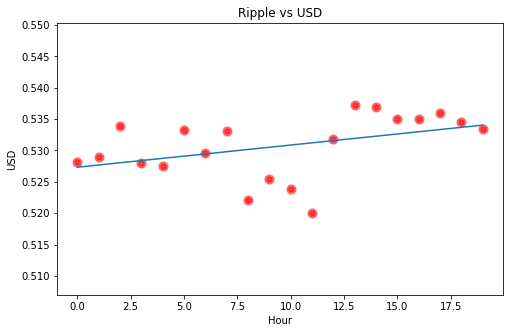

In [200]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='red', linewidths=4, alpha=0.6)
plt.plot(X, Y_predicted)
plt.title('Ripple vs USD')
plt.xlabel('Hour')
plt.ylabel('USD')
plt.show()

#### Linear Regression Squared Model

* Y = a + (b)(X²)

In [201]:
X2 = X ** 2

In [202]:
regression2 = LinearRegression()

In [203]:
regression2.fit(X2, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
regression2.score(X2, Y)

0.23787575063550037

In [205]:
Y_predicted2 = regression2.predict(X2)

In [206]:
SSD = np.sum((Y - Y_predicted2) ** 2) 
RSE = np.sqrt(SSD / (len(X2) - 1))
price_mean = np.mean(Y)
error = RSE / price_mean

SSD, RSE, price_mean, error

(0.0003673464641736528,
 0.0043970472399318446,
 0.53069100000000002,
 0.0082855131139059155)

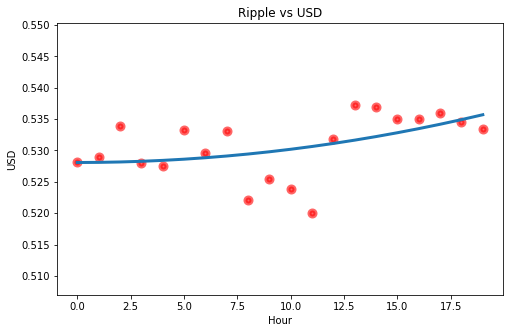

In [207]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, linewidths=4, alpha=0.6, color='red')
plt.plot(X, Y_predicted2, linewidth=3)
plt.title('Ripple vs USD')
plt.xlabel('Hour')
plt.ylabel('USD')
plt.show()

In [208]:
at_8 = regression2.predict(20)
at_8 - RSE, at_8, at_8 + RSE

(array([ 0.52411047]), array([ 0.52850752]), array([ 0.53290456]))

#### Polynomials

In [209]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [210]:
poly = PolynomialFeatures(degree=6)

In [211]:
X_poly = poly.fit_transform(X)

In [212]:
regression3 = linear_model.LinearRegression()

In [213]:
regression3.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [214]:
regression3.score(X_poly, Y)

0.61230208712731726

In [215]:
regression3.intercept_, regression3.coef_

(0.52901996323704048,
 array([  0.00000000e+00,  -3.35843426e-03,   3.37279633e-03,
         -9.18068444e-04,   1.01106025e-04,  -4.85854943e-06,
          8.50650042e-08]))

In [216]:
Y_predicted3 = regression3.predict(X_poly)

In [217]:
SSD = np.sum((Y - Y_predicted3) ** 2) 
RSE = np.sqrt(SSD / (len(X2) - 1))
price_mean = np.mean(Y)
error = RSE / price_mean

SSD, RSE, price_mean, error

(0.00018687170442357919,
 0.0031361366144348536,
 0.53069100000000002,
 0.005909534200570301)

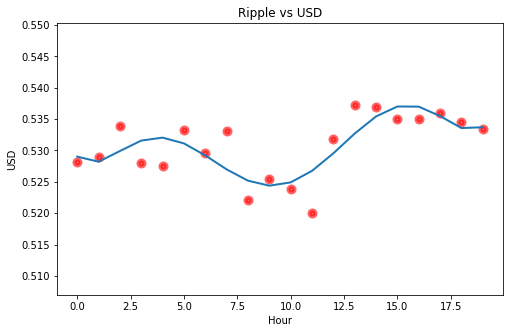

In [218]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, linewidths=4, alpha=0.6, color='red')
plt.plot(X, Y_predicted3, linewidth=2)
plt.title('Ripple vs USD')
plt.xlabel('Hour')
plt.ylabel('USD')
plt.show()

In [219]:
at_8 = regression3.predict(np.array([[1.00000000e+00],   [2.00000000e+01],   [4.00000000e+02], [8.00000000e+03],   [1.60000000e+05],   [3.20000000e+06], [6.40000000e+07]]).T)
at_8 - RSE, at_8, at_8 + RSE

(array([ 0.53705217]), array([ 0.54018831]), array([ 0.54332445]))

## Test plot

In [220]:
X_test = poly.fit_transform(np.array([np.arange(0,len(Y)+1)]).T)

In [221]:
Y_predicted4 = regression3.predict(X_test)

In [222]:
X_plot = np.array([np.arange(0,len(Y)+1)]).T

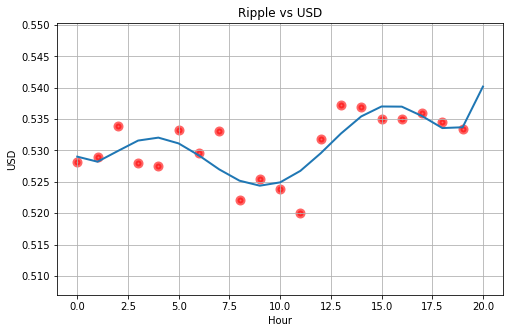

In [223]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, linewidths=4, alpha=0.6, color='red')
plt.plot(X_plot, Y_predicted4, linewidth=2)
plt.title('Ripple vs USD')
plt.xlabel('Hour')
plt.ylabel('USD')
plt.grid(True)
plt.show()

In [224]:
X_plot

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20]])

In [225]:
X_test

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00],
       [  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          8.00000000e+00,   1.60000000e+01,   3.20000000e+01,
          6.40000000e+01],
       [  1.00000000e+00,   3.00000000e+00,   9.00000000e+00,
          2.70000000e+01,   8.10000000e+01,   2.43000000e+02,
          7.29000000e+02],
       [  1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01,   2.56000000e+02,   1.02400000e+03,
          4.09600000e+03],
       [  1.00000000e+00,   5.00000000e+00,   2.50000000e+01,
          1.25000000e+02,   6.25000000e+02,   3.12500000e+03,
          1.56250000e+04],
       [  1.00000000e+00,   6.00000000e+00,   3.60000000e+01,
          2.16000000e+02,   1.29

### Test 2

In [226]:
from sklearn.cross_validation import train_test_split

In [227]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [228]:
regr_test = LinearRegression()

In [229]:
regr_test.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [230]:
predict = regr_test.predict(X_test)

In [231]:
regr_test.score(X_train, Y_train)

0.13072904790964934

In [232]:
regr_test.intercept_, regr_test.coef_

(0.52825439838220423, array([ 0.00033665]))

In [233]:
polyno = PolynomialFeatures(degree=7)

In [234]:
X_polyno = polyno.fit_transform(X_train)

In [235]:
regression_test = LinearRegression()

In [236]:
regression_test.fit(X_polyno, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [237]:
regression_test.score(X_polyno, Y_train)

0.85156912562279696

In [238]:
regression_test.intercept_, regression_test.coef_

(0.5280906396323235,
 array([  0.00000000e+00,   3.84281484e-02,  -3.52890152e-02,
          1.22766336e-02,  -2.07294011e-03,   1.81384017e-04,
         -7.90370124e-06,   1.35601527e-07]))

In [239]:
predict2 = regression_test.predict(X_polyno)

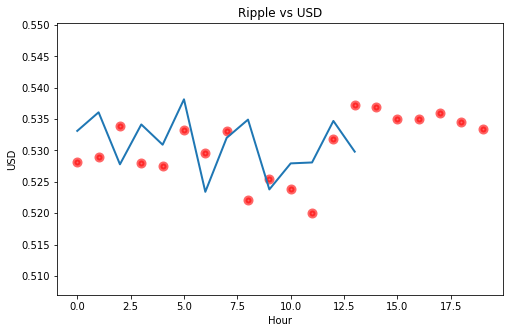

In [240]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, linewidths=4, alpha=0.6, color='red')
plt.plot(X[:-6], predict2, linewidth=2)
plt.title('Ripple vs USD')
plt.xlabel('Hour')
plt.ylabel('USD')
plt.show()

In [241]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [242]:
len(X[:-6])

14

In [243]:
len(predict2)

14

In [244]:
predict2

array([ 0.53312424,  0.53608884,  0.52779624,  0.53415271,  0.53092123,
        0.53815976,  0.52341142,  0.53201438,  0.53492321,  0.52379122,
        0.52794599,  0.52809064,  0.53471295,  0.52981716])

In [245]:
X_train

array([[ 6],
       [13],
       [ 4],
       [ 2],
       [ 5],
       [14],
       [ 9],
       [ 7],
       [16],
       [11],
       [ 3],
       [ 0],
       [15],
       [12]])

In [246]:
X_polyno

array([[  1.00000000e+00,   6.00000000e+00,   3.60000000e+01,
          2.16000000e+02,   1.29600000e+03,   7.77600000e+03,
          4.66560000e+04,   2.79936000e+05],
       [  1.00000000e+00,   1.30000000e+01,   1.69000000e+02,
          2.19700000e+03,   2.85610000e+04,   3.71293000e+05,
          4.82680900e+06,   6.27485170e+07],
       [  1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01,   2.56000000e+02,   1.02400000e+03,
          4.09600000e+03,   1.63840000e+04],
       [  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          8.00000000e+00,   1.60000000e+01,   3.20000000e+01,
          6.40000000e+01,   1.28000000e+02],
       [  1.00000000e+00,   5.00000000e+00,   2.50000000e+01,
          1.25000000e+02,   6.25000000e+02,   3.12500000e+03,
          1.56250000e+04,   7.81250000e+04],
       [  1.00000000e+00,   1.40000000e+01,   1.96000000e+02,
          2.74400000e+03,   3.84160000e+04,   5.37824000e+05,
          7.52953600e+06,   1.0

In [247]:
X_train_ = np.random.randint(0, 20, 20)

In [248]:
X_train_

array([ 0,  6,  5,  3, 13,  8, 17,  5,  3,  9, 16, 11, 18, 12, 16,  0,  4,
        9,  2,  9])

In [249]:
X_poly = PolynomialFeatures(degree=7)

In [250]:
X_poly = X_poly.fit_transform(X_train_.reshape(-1, 1))

In [251]:
rgr = LinearRegression()

In [252]:
rgr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [254]:
y_ = rgr.predict(X_poly)

ValueError: shapes (20,8) and (1,) not aligned: 8 (dim 1) != 1 (dim 0)